In [59]:
import  pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#El enfoque es la diferencia entre RB y R, RB es abierta binario, R es un archivo de texto abierto
data=pd.read_pickle(r'uke_eggedal_data_challenge.pkl')
#data = np.array(data)


In [3]:
data.keys()

dict_keys(['flow', 'obs_tas', 'flow_dates', 'obs_lon_lat', 'obs_pr', 'obs_dates'])

In [4]:
for k in data.keys():
    print(k)
    print(type(data[k]))
    print(np.array(data[k]).shape)

flow
<class 'numpy.ndarray'>
(21542,)
obs_tas
<class 'numpy.ndarray'>
(21546, 9)
flow_dates
<class 'pandas.core.series.Series'>
(21542,)
obs_lon_lat
<class 'list'>
(2,)
obs_pr
<class 'numpy.ndarray'>
(21546, 9)
obs_dates
<class 'pandas.core.series.Series'>
(21546,)


In [5]:
pd.DataFrame(data["obs_tas"])

,0,1,2,3,4,5,6,7,8
0,-10.600000,-9.7,-6.7,-8.800000,-8.900000,-7.500000,-8.1,-6.5,-5.4
1,-20.500000,-19.1,-12.0,-17.700001,-17.700001,-13.100000,-15.5,-11.8,-9.1
2,-23.600000,-22.5,-15.1,-21.400000,-21.400000,-16.299999,-19.4,-14.6,-12.2
3,-16.200001,-16.0,-14.1,-15.600000,-15.400000,-14.500000,-15.0,-13.8,-11.9
4,-7.900000,-7.8,-9.5,-7.600000,-7.500000,-8.000000,-7.4,-8.6,-8.2
...,...,...,...,...,...,...,...,...,...
21541,-12.500000,-11.7,-8.6,-11.000000,-10.900000,-9.200000,-9.7,-8.4,-7.5
21542,-12.500000,-11.9,-9.1,-11.400000,-11.200000,-9.800000,-10.6,-8.6,-7.5
21543,-11.900000,-11.4,-8.4,-10.800000,-10.800000,-8.600000,-9.3,-7.2,-6.3
21544,-7.000000,-6.5,-3.4,-5.900000,-6.100000,-4.800000,-5.0,-3.8,-3.0


In [6]:
# asigno cada columna a una variable para crear tablas

flow = pd.DataFrame(data['flow']) # flujo (m3 / sec) - one location - 21542 rows
obs_tas = pd.DataFrame(data['obs_tas']) # Temperature (deg C) – 9 locations - 21546 rows
flow_dates = pd.DataFrame(data['flow_dates']) # dates - 21542 rows
obs_lon_lat = pd.DataFrame(data['obs_lon_lat']) # lon and lat- one location - 2 rows
obs_pr = pd.DataFrame(data['obs_pr']) # Precipitation (mm) - 9 locations - 21546 rows
obs_dates = pd.DataFrame(data['obs_dates']) # dates - 21546 rows

Podemos ver que la variable *flow* esta directamente relacionada con la variable *flow_dates* debido a que tienen el mismo número de filas, y las variables *obs_tas*, *obs_pr* y *obs_dates* estan tambien relacionadas por tener el mismo número de filas.

Lo primero que haremos es analizar por tablas hechas de acuerdo a las relaciones que encontramos.

In [52]:
# Creamos una tabla del Flow

# eliminamos el indice de fecha para concatenar con el flujo
flow_dates=flow_dates.reset_index()
flow_dates=flow_dates.drop(['index'], axis=1)
flow_dates=flow_dates.rename(columns={0:1})
# hacemos una sola tabla
data_flow = pd.concat([flow, flow_dates], axis=1)
data_flow = data_flow.rename(columns={0:'flow', 1:'flow_dates'})
data_flow

,flow,flow_dates
0,1.723781,1958-01-04
1,0.960882,1958-01-05
2,0.001000,1958-01-06
3,0.001000,1958-01-07
4,0.316796,1958-01-08
...,...,...
21537,4.843290,2016-12-22
21538,3.756970,2016-12-23
21539,3.556818,2016-12-24
21540,3.402133,2016-12-25


In [53]:
#comprobamos que no haya valores nulos
data_flow.describe()

,flow
count,21542.000000
mean,6.899912
std,9.621918
min,0.000031
25%,1.171874
50%,3.181420
75%,8.560671
max,85.397653


In [54]:
data_flow.notnull().describe()

,flow,flow_dates
count,21542,21542
unique,1,1
top,True,True
freq,21542,21542


(array([1.4081e+04, 3.3880e+03, 1.6280e+03, 9.5300e+02, 5.5000e+02,
        3.3700e+02, 2.2800e+02, 1.2600e+02, 9.7000e+01, 6.8000e+01,
        3.7000e+01, 2.5000e+01, 1.6000e+01, 5.0000e+00, 3.0000e+00]),
 array([3.14292029e-05, 5.69320621e+00, 1.13863810e+01, 1.70795558e+01,
        2.27727306e+01, 2.84659054e+01, 3.41590801e+01, 3.98522549e+01,
        4.55454297e+01, 5.12386045e+01, 5.69317793e+01, 6.26249541e+01,
        6.83181288e+01, 7.40113036e+01, 7.97044784e+01, 8.53976532e+01]),
 <BarContainer object of 15 artists>)

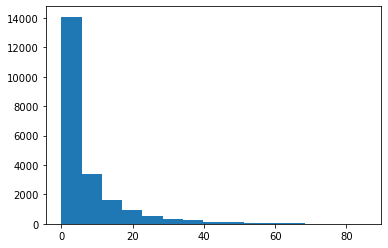

In [62]:
plt.hist(data_flow['flow'], 15)

In [8]:
# Creamos una tabla de tempraturas, precipitaciones y sus fechas

# eliminamos el indice de fecha para concatenar las columnas
obs_dates=obs_dates.reset_index()
obs_dates=obs_dates.drop(['index'], axis=1)
obs_dates=obs_dates.rename(columns={0:1})

# cambiamos los nombres de columas con sufijo del lugar
obs_tas=obs_tas.rename(columns={0:'obs_tas_1', 1:'obs_tas_2', 2:'obs_tas_3', 3:'obs_tas_4', 4:'obs_tas_5', 5:'obs_tas_6', 6:'obs_tas_7', 7:'obs_tas_8', 8:'obs_tas_9'})
obs_pr=obs_pr.rename(columns={0:'obs_pr_1', 1:'obs_pr_2', 2:'obs_pr_3', 3:'obs_pr_4', 4:'obs_pr_5', 5:'obs_pr_6', 6:'obs_pr_7', 7:'obs_pr_8', 8:'obs_pr_9'})
obs_dates=obs_dates.rename(columns={1:'obs_dates'})

# concatenamos
data_tas_pr = pd.concat([obs_tas, obs_pr, obs_dates], axis=1)
data_tas_pr

,obs_tas_1,obs_tas_2,obs_tas_3,obs_tas_4,obs_tas_5,obs_tas_6,obs_tas_7,obs_tas_8,obs_tas_9,obs_pr_1,obs_pr_2,obs_pr_3,obs_pr_4,obs_pr_5,obs_pr_6,obs_pr_7,obs_pr_8,obs_pr_9,obs_dates
0,-10.600000,-9.7,-6.7,-8.800000,-8.900000,-7.500000,-8.1,-6.5,-5.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,1957-01-01
1,-20.500000,-19.1,-12.0,-17.700001,-17.700001,-13.100000,-15.5,-11.8,-9.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.1,1957-01-02
2,-23.600000,-22.5,-15.1,-21.400000,-21.400000,-16.299999,-19.4,-14.6,-12.2,0.1,0.0,0.3,0.1,0.3,0.3,0.4,0.3,0.5,1957-01-03
3,-16.200001,-16.0,-14.1,-15.600000,-15.400000,-14.500000,-15.0,-13.8,-11.9,1.0,0.0,1.0,1.1,0.9,0.7,0.8,0.4,0.6,1957-01-04
4,-7.900000,-7.8,-9.5,-7.600000,-7.500000,-8.000000,-7.4,-8.6,-8.2,9.3,8.6,8.0,8.9,8.7,10.2,9.3,10.1,9.7,1957-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21541,-12.500000,-11.7,-8.6,-11.000000,-10.900000,-9.200000,-9.7,-8.4,-7.5,2.2,0.1,1.1,1.5,0.1,0.0,0.0,0.0,0.0,2015-12-27
21542,-12.500000,-11.9,-9.1,-11.400000,-11.200000,-9.800000,-10.6,-8.6,-7.5,5.5,4.9,8.3,6.1,3.7,5.0,5.4,0.0,5.1,2015-12-28
21543,-11.900000,-11.4,-8.4,-10.800000,-10.800000,-8.600000,-9.3,-7.2,-6.3,1.8,1.7,2.1,2.7,0.2,0.8,2.2,0.0,0.0,2015-12-29
21544,-7.000000,-6.5,-3.4,-5.900000,-6.100000,-4.800000,-5.0,-3.8,-3.0,4.1,3.5,4.6,5.1,3.5,3.4,3.2,0.0,3.6,2015-12-30


In [39]:
#comprobamos que no haya valores nulos
data_tas_pr.describe()

,obs_tas_1,obs_tas_2,obs_tas_3,obs_tas_4,obs_tas_5,obs_tas_6,obs_tas_7,obs_tas_8,obs_tas_9,obs_pr_1,obs_pr_2,obs_pr_3,obs_pr_4,obs_pr_5,obs_pr_6,obs_pr_7,obs_pr_8,obs_pr_9
count,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000
mean,-0.049341,0.711134,2.972459,1.485445,1.271053,2.306071,1.886294,2.834048,3.518686,1.991808,2.006827,2.073629,2.212420,2.265140,2.214713,2.304117,2.383965,2.257083
std,8.257276,8.392313,9.042364,8.565316,8.461657,8.606104,8.567973,8.788865,8.951342,4.026747,4.349912,4.496016,4.563929,4.757687,4.906254,4.804654,5.414730,5.178496
min,-33.799999,-32.599998,-33.299999,-33.700001,-32.799999,-32.200001,-33.200001,-32.599998,-30.799999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.800000,-5.200000,-3.100000,-4.400000,-4.600000,-3.700000,-4.000000,-3.200000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.200000,0.900000,3.400000,1.800000,1.500000,2.500000,2.200000,3.100000,3.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.600000,7.600000,10.500000,8.500000,8.200000,9.500000,9.000000,10.200000,11.100000,2.500000,2.200000,2.175000,2.600000,2.600000,2.200000,2.600000,2.200000,2.000000
max,20.299999,21.200001,23.400000,21.700001,21.700001,22.700001,21.799999,23.299999,24.000000,61.500000,60.700001,66.800003,64.000000,62.400002,61.299999,64.500000,67.699997,73.699997


In [40]:
data_tas_pr.notnull().describe()

,obs_tas_1,obs_tas_2,obs_tas_3,obs_tas_4,obs_tas_5,obs_tas_6,obs_tas_7,obs_tas_8,obs_tas_9,obs_pr_1,obs_pr_2,obs_pr_3,obs_pr_4,obs_pr_5,obs_pr_6,obs_pr_7,obs_pr_8,obs_pr_9,obs_dates
count,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
freq,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546


array([[<AxesSubplot:title={'center':'obs_tas_1'}>,
        <AxesSubplot:title={'center':'obs_tas_2'}>,
        <AxesSubplot:title={'center':'obs_tas_3'}>,
        <AxesSubplot:title={'center':'obs_tas_4'}>],
       [<AxesSubplot:title={'center':'obs_tas_5'}>,
        <AxesSubplot:title={'center':'obs_tas_6'}>,
        <AxesSubplot:title={'center':'obs_tas_7'}>,
        <AxesSubplot:title={'center':'obs_tas_8'}>],
       [<AxesSubplot:title={'center':'obs_tas_9'}>,
        <AxesSubplot:title={'center':'obs_pr_1'}>,
        <AxesSubplot:title={'center':'obs_pr_2'}>,
        <AxesSubplot:title={'center':'obs_pr_3'}>],
       [<AxesSubplot:title={'center':'obs_pr_4'}>,
        <AxesSubplot:title={'center':'obs_pr_5'}>,
        <AxesSubplot:title={'center':'obs_pr_6'}>,
        <AxesSubplot:title={'center':'obs_pr_7'}>],
       [<AxesSubplot:title={'center':'obs_pr_8'}>,
        <AxesSubplot:title={'center':'obs_pr_9'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

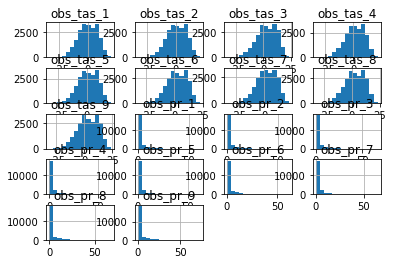

In [63]:
data_tas_pr.hist(bins=15)